In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from skimage.transform import hough_circle
from skimage.draw import circle_perimeter

In [9]:
def quad_conversion(quad_input):
    mapping = np.array([52, 60, 61, 53, 50, 58, 59, 51, 48, 56, 57, 49, 38, 46, 47, 39,\
                        22, 30, 31, 23,  6, 14, 15,  7, 36, 44, 45, 37, 20, 28, 29, 21,\
                         4, 12, 13,  5, 34, 42, 43, 35, 18, 26, 27, 19,  2, 10, 11,  3,\
                        32, 40, 41, 33, 16, 24, 25, 17,  0,  8,  9,  1])
    quad_output = np.zeros(64)
    for i in range(60):
        quad_output[mapping[i]] = quad_input[i]
    return quad_output

In [10]:
def quad_to_pixel(quad_input):
    quad = quad_input.copy().reshape(8,8)
    pixel = np.zeros((32,32))
    for j in range(8):
        for k in range(8):
            pixel[(4*j):(4*j+4),(4*k):(4*k+4)] = quad[j,k]
    pixel = pixel.reshape(1024)
    return pixel

## train, hough, LED, pixel

In [4]:
def train_hough_led_pixel(input_name):
    
    file_input = open(input_name)
    hough = np.empty(0)
    
    line = file_input.readline()
    while(line):
        hit = np.fromstring(line, sep="\t", dtype=int)[1:]
        pixel = np.zeros(1024)
        pixel[hit] = 1
        pixel = pixel.reshape(32,32)
        
        hough_radii = np.arange(7,10)
        hough_accu = hough_circle(pixel, hough_radii)
        peak = hough_accu.sum(axis=0).max()
        peak_index = np.argmax(hough_accu.sum(axis=0))
        center_x = int(peak_index%32)
        center_y = int(peak_index//32)
        radius = 7*hough_accu[0,center_y,center_x]+8*hough_accu[1,center_y,center_x]+9*hough_accu[2,center_y,center_x]
        if radius>0:
            radius /= hough_accu[:,center_y,center_x].sum()
        results = np.array([peak, radius, center_x, center_y])
        if hough.size>0:
            hough = np.vstack((hough, results))
        else:
            hough = results
        
        line = file_input.readline()   
    file_input.close()
    return hough

In [5]:
hough_led_sig_raw1 = train_hough_led_pixel("data/benchtest/pixel/signalLED_run1_pixel_new.ml")
hough_led_sig_raw2 = train_hough_led_pixel("data/benchtest/pixel/signalLED_run2336_pixel.ml")
hough_led_sig_65 = train_hough_led_pixel("data/benchtest/pixel/signalLED_bgLED_run1_pixel.ml")
hough_led_sig_140 = train_hough_led_pixel("data/benchtest/pixel/signalLED_bgLED180_run2339_pixel.ml")
hough_led_sig_200 = train_hough_led_pixel("data/benchtest/pixel/signalLED_bgLED370_run2337_pixel.ml")
hough_led_bkg_65 = train_hough_led_pixel("data/benchtest/pixel/bgLED_run1_pixel.ml")
hough_led_bkg_140 = train_hough_led_pixel("data/benchtest/pixel/bgLED_180_run2345_pixel_LED.ml")
hough_led_bkg_200 = train_hough_led_pixel("data/benchtest/pixel/bgLED_370_run2369_pixel_LED.ml")

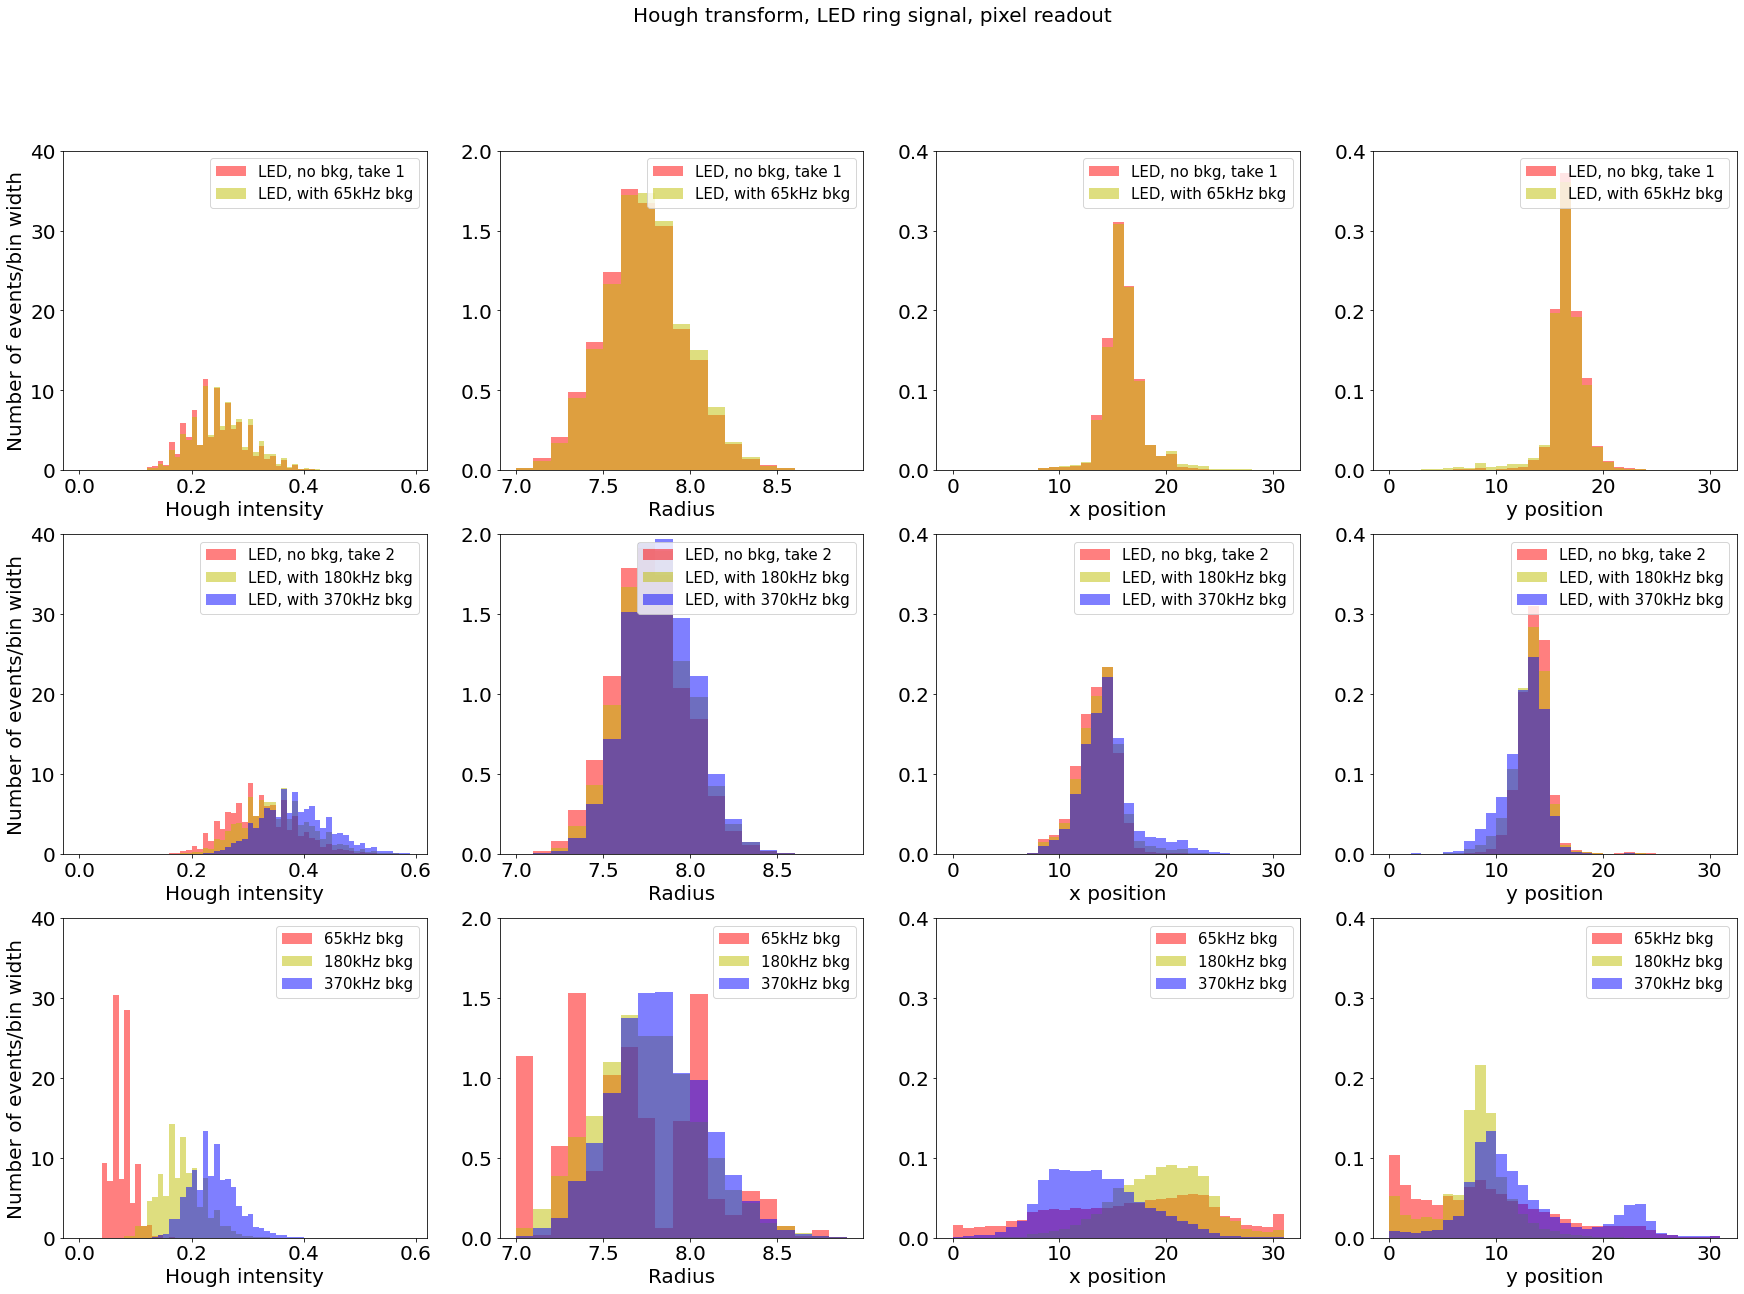

In [6]:
fig, axs = plt.subplots(3,4,figsize=(30,20))
fig.suptitle("Hough transform, LED ring signal, pixel readout",fontsize=20)
        
hist_led_sig_raw1_intensity = axs[0,0].hist(hough_led_sig_raw1[:,0], bins=np.arange(0,0.6,0.01), alpha=0.5, density=True, color='r', label='LED, no bkg, take 1')
hist_led_sig_65_intensity = axs[0,0].hist(hough_led_sig_65[:,0], bins=np.arange(0,0.6,0.01), alpha=0.5, density=True, color='y', label='LED, with 65kHz bkg')
hist_led_sig_raw2_intensity = axs[1,0].hist(hough_led_sig_raw2[:,0], bins=np.arange(0,0.6,0.01), alpha=0.5, density=True, color='r', label='LED, no bkg, take 2')
hist_led_sig_140_intensity = axs[1,0].hist(hough_led_sig_140[:,0], bins=np.arange(0,0.6,0.01), alpha=0.5, density=True, color='y', label='LED, with 180kHz bkg')
hist_led_sig_200_intensity = axs[1,0].hist(hough_led_sig_200[:,0], bins=np.arange(0,0.6,0.01), alpha=0.5, density=True, color='b', label='LED, with 370kHz bkg')
hist_led_bkg_65_intensity = axs[2,0].hist(hough_led_bkg_65[:,0], bins=np.arange(0,0.6,0.01), alpha=0.5, density=True, color='r', label='65kHz bkg')
hist_led_bkg_140_intensity = axs[2,0].hist(hough_led_bkg_140[:,0], bins=np.arange(0,0.6,0.01), alpha=0.5, density=True, color='y', label='180kHz bkg')
hist_led_bkg_200_intensity = axs[2,0].hist(hough_led_bkg_200[:,0], bins=np.arange(0,0.6,0.01), alpha=0.5, density=True, color='b', label='370kHz bkg')

hist_led_sig_raw1_radius = axs[0,1].hist(hough_led_sig_raw1[:,1], bins=np.arange(7,9,0.1), alpha=0.5, density=True, color='r', label='LED, no bkg, take 1')
hist_led_sig_65_radius = axs[0,1].hist(hough_led_sig_65[:,1], bins=np.arange(7,9,0.1), alpha=0.5, density=True, color='y', label='LED, with 65kHz bkg')
hist_led_sig_raw2_radius = axs[1,1].hist(hough_led_sig_raw2[:,1], bins=np.arange(7,9,0.1), alpha=0.5, density=True, color='r', label='LED, no bkg, take 2')
hist_led_sig_140_radius = axs[1,1].hist(hough_led_sig_140[:,1], bins=np.arange(7,9,0.1), alpha=0.5, density=True, color='y', label='LED, with 180kHz bkg')
hist_led_sig_200_radius = axs[1,1].hist(hough_led_sig_200[:,1], bins=np.arange(7,9,0.1), alpha=0.5, density=True, color='b', label='LED, with 370kHz bkg')
hist_led_bkg_65_radius = axs[2,1].hist(hough_led_bkg_65[:,1], bins=np.arange(7,9,0.1), alpha=0.5, density=True, color='r', label='65kHz bkg')
hist_led_bkg_140_radius = axs[2,1].hist(hough_led_bkg_140[:,1], bins=np.arange(7,9,0.1), alpha=0.5, density=True, color='y', label='180kHz bkg')
hist_led_bkg_200_radius = axs[2,1].hist(hough_led_bkg_200[:,1], bins=np.arange(7,9,0.1), alpha=0.5, density=True, color='b', label='370kHz bkg')

hist_led_sig_raw1_x = axs[0,2].hist(hough_led_sig_raw1[:,2], bins=np.arange(32), alpha=0.5, density=True, color='r', label='LED, no bkg, take 1')
hist_led_sig_65_x = axs[0,2].hist(hough_led_sig_65[:,2], bins=np.arange(32), alpha=0.5, density=True, color='y', label='LED, with 65kHz bkg')
hist_led_sig_raw2_x = axs[1,2].hist(hough_led_sig_raw2[:,2], bins=np.arange(32), alpha=0.5, density=True, color='r', label='LED, no bkg, take 2')
hist_led_sig_140_x = axs[1,2].hist(hough_led_sig_140[:,2], bins=np.arange(32), alpha=0.5, density=True, color='y', label='LED, with 180kHz bkg')
hist_led_sig_200_x = axs[1,2].hist(hough_led_sig_200[:,2], bins=np.arange(32), alpha=0.5, density=True, color='b', label='LED, with 370kHz bkg')
hist_led_bkg_65_x = axs[2,2].hist(hough_led_bkg_65[:,2], bins=np.arange(32), alpha=0.5, density=True, color='r', label='65kHz bkg')
hist_led_bkg_140_x = axs[2,2].hist(hough_led_bkg_140[:,2], bins=np.arange(32), alpha=0.5, density=True, color='y', label='180kHz bkg')
hist_led_bkg_200_x = axs[2,2].hist(hough_led_bkg_200[:,2], bins=np.arange(32), alpha=0.5, density=True, color='b', label='370kHz bkg')

hist_led_sig_raw1_y = axs[0,3].hist(hough_led_sig_raw1[:,3], bins=np.arange(32), alpha=0.5, density=True, color='r', label='LED, no bkg, take 1')
hist_led_sig_65_y = axs[0,3].hist(hough_led_sig_65[:,3], bins=np.arange(32), alpha=0.5, density=True, color='y', label='LED, with 65kHz bkg')
hist_led_sig_raw2_y = axs[1,3].hist(hough_led_sig_raw2[:,3], bins=np.arange(32), alpha=0.5, density=True, color='r', label='LED, no bkg, take 2')
hist_led_sig_140_y = axs[1,3].hist(hough_led_sig_140[:,3], bins=np.arange(32), alpha=0.5, density=True, color='y', label='LED, with 180kHz bkg')
hist_led_sig_200_y = axs[1,3].hist(hough_led_sig_200[:,3], bins=np.arange(32), alpha=0.5, density=True, color='b', label='LED, with 370kHz bkg')
hist_led_bkg_65_y = axs[2,3].hist(hough_led_bkg_65[:,3], bins=np.arange(32), alpha=0.5, density=True, color='r', label='65kHz bkg')
hist_led_bkg_140_y = axs[2,3].hist(hough_led_bkg_140[:,3], bins=np.arange(32), alpha=0.5, density=True, color='y', label='180kHz bkg')
hist_led_bkg_200_y = axs[2,3].hist(hough_led_bkg_200[:,3], bins=np.arange(32), alpha=0.5, density=True, color='b', label='370kHz bkg')

for i in range(3):
    axs[i,0].set_xlabel("Hough intensity",fontsize=20)
    axs[i,1].set_xlabel("Radius",fontsize=20)
    axs[i,2].set_xlabel("x position",fontsize=20)
    axs[i,3].set_xlabel("y position",fontsize=20)
    axs[i,0].set_ylim([0,40])
    axs[i,1].set_ylim([0,2])
    axs[i,2].set_ylim([0,0.4])
    axs[i,3].set_ylim([0,0.4])
    for j in range(4):
        axs[i,j].legend(fontsize=15)
        axs[i,j].tick_params(labelsize=20)
        axs[i,0].set_ylabel("Number of events/bin width",fontsize=20)
plt.savefig('pixel_dist.png')

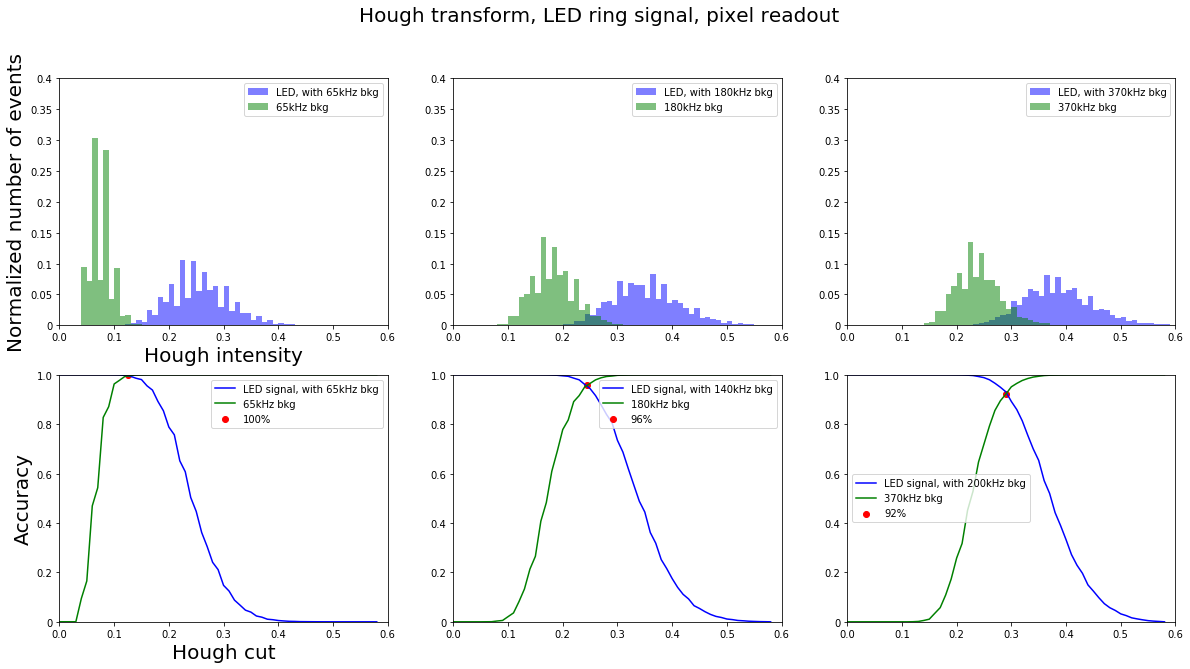

In [47]:
fig, axs = plt.subplots(2,3,figsize=(20,10))

hist_led_sig_65 = axs[0,0].hist(hough_led_sig_65[:,0], bins=np.arange(0,0.6,0.01), alpha=0.5, density=True, color='b', label='LED, with 65kHz bkg')
hist_led_bkg_65 = axs[0,0].hist(hough_led_bkg_65[:,0], bins=np.arange(0,0.6,0.01), alpha=0.5, density=True, color='g', label='65kHz bkg')

hist_led_sig_140 = axs[0,1].hist(hough_led_sig_140[:,0], bins=np.arange(0,0.6,0.01), alpha=0.5, density=True, color='b', label='LED, with 180kHz bkg')
hist_led_bkg_140 = axs[0,1].hist(hough_led_bkg_140[:,0], bins=np.arange(0,0.6,0.01), alpha=0.5, density=True, color='g', label='180kHz bkg')

hist_led_sig_200 = axs[0,2].hist(hough_led_sig_200[:,0], bins=np.arange(0,0.6,0.01), alpha=0.5, density=True, color='b', label='LED, with 370kHz bkg')
hist_led_bkg_200 = axs[0,2].hist(hough_led_bkg_200[:,0], bins=np.arange(0,0.6,0.01), alpha=0.5, density=True, color='g', label='370kHz bkg')

axs[1,0].plot(np.arange(0,0.59,0.01), 100-np.cumsum(hist_led_sig_65[0]),color='b', label='LED signal, with 65kHz bkg')
axs[1,0].plot(np.arange(0,0.59,0.01), np.cumsum(hist_led_bkg_65[0]),color='g', label='65kHz bkg')
axs[1,0].scatter(0.125,100, color='r', label="100%")

axs[1,1].plot(np.arange(0,0.59,0.01), 100-np.cumsum(hist_led_sig_140[0]),color='b', label='LED signal, with 140kHz bkg')
axs[1,1].plot(np.arange(0,0.59,0.01), np.cumsum(hist_led_bkg_140[0]),color='g', label='180kHz bkg')
axs[1,1].scatter(0.245,96, color='r', label="96%")

axs[1,2].plot(np.arange(0,0.59,0.01), 100-np.cumsum(hist_led_sig_200[0]),color='b', label='LED signal, with 200kHz bkg')
axs[1,2].plot(np.arange(0,0.59,0.01), np.cumsum(hist_led_bkg_200[0]),color='g', label='370kHz bkg')
axs[1,2].scatter(0.29,92, color='r', label="92%")

fig.suptitle("Hough transform, LED ring signal, pixel readout",fontsize=20)
for i in range(3):
    axs[0,i].legend(fontsize=10)
    axs[0,0].set_xlabel("Hough intensity",fontsize=20)
    axs[0,0].set_ylabel("Normalized number of events",fontsize=20)
    axs[0,i].set_xlim([0,0.6])
    axs[0,i].set_ylim([0,40])
    axs[0,i].set_yticklabels([0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40])
for i in range(3):
    axs[1,i].legend(fontsize=10)
    axs[1,0].set_xlabel("Hough cut",fontsize=20)
    axs[1,0].set_ylabel("Accuracy",fontsize=20)
    axs[1,i].set_xlim([0,0.6])
    axs[1,i].set_ylim([0,100])
    axs[1,i].set_yticklabels([0,0.2,0.4,0.6,0.8,1.0])
plt.savefig('pixel_accuracy.png')

## train, hough, LED, quad

In [4]:
def train_hough_led_quad(input_name):
    
    file_input = open(input_name)
    hough = np.empty(0)
    
    line = file_input.readline()
    while(line):
        hit = np.fromstring(line, sep="\t")[1:]
        quad = quad_conversion(hit).reshape(8,8)
        
        hough_radii = np.arange(1,4)
        hough_accu = hough_circle(quad, hough_radii)
        peak = hough_accu.sum(axis=0).max()
        peak_index = np.argmax(hough_accu.sum(axis=0))
        center_x = int(peak_index%8)
        center_y = int(peak_index//8)
        radius = 1*hough_accu[0,center_y,center_x]+2*hough_accu[1,center_y,center_x]+3*hough_accu[2,center_y,center_x]
        if radius>0:
            radius /= hough_accu[:,center_y,center_x].sum()
        results = np.array([peak, radius, center_x, center_y])
        if hough.size>0:
            hough = np.vstack((hough, results))
        else:
            hough = results
        
        line = file_input.readline()   
    file_input.close()
    return hough

In [7]:
hough_led_quad_sig_raw2 = train_hough_led_quad("data/benchtest/fadc/signalLED_run2336_fadc.ml")
hough_led_quad_sig_65 = train_hough_led_quad("data/benchtest/fadc/signalLED_bgLED65_run1_fadc.ml")
hough_led_quad_sig_180 = train_hough_led_quad("data/benchtest/fadc/signalLED_bgLED180_run2339_fadc.ml")
hough_led_quad_sig_370 = train_hough_led_quad("data/benchtest/fadc/signalLED_bgLED370_run2337_fadc.ml")
hough_led_quad_bkg_65 = train_hough_led_quad("data/benchtest/fadc/bgLED_run165_fadc_LED.ml")
hough_led_quad_bkg_180 = train_hough_led_quad("data/benchtest/fadc/bgLED_180_run2345_fadc_LED.ml")
hough_led_quad_bkg_370 = train_hough_led_quad("data/benchtest/fadc/bgLED_370_run2369_fadc_LED.ml")

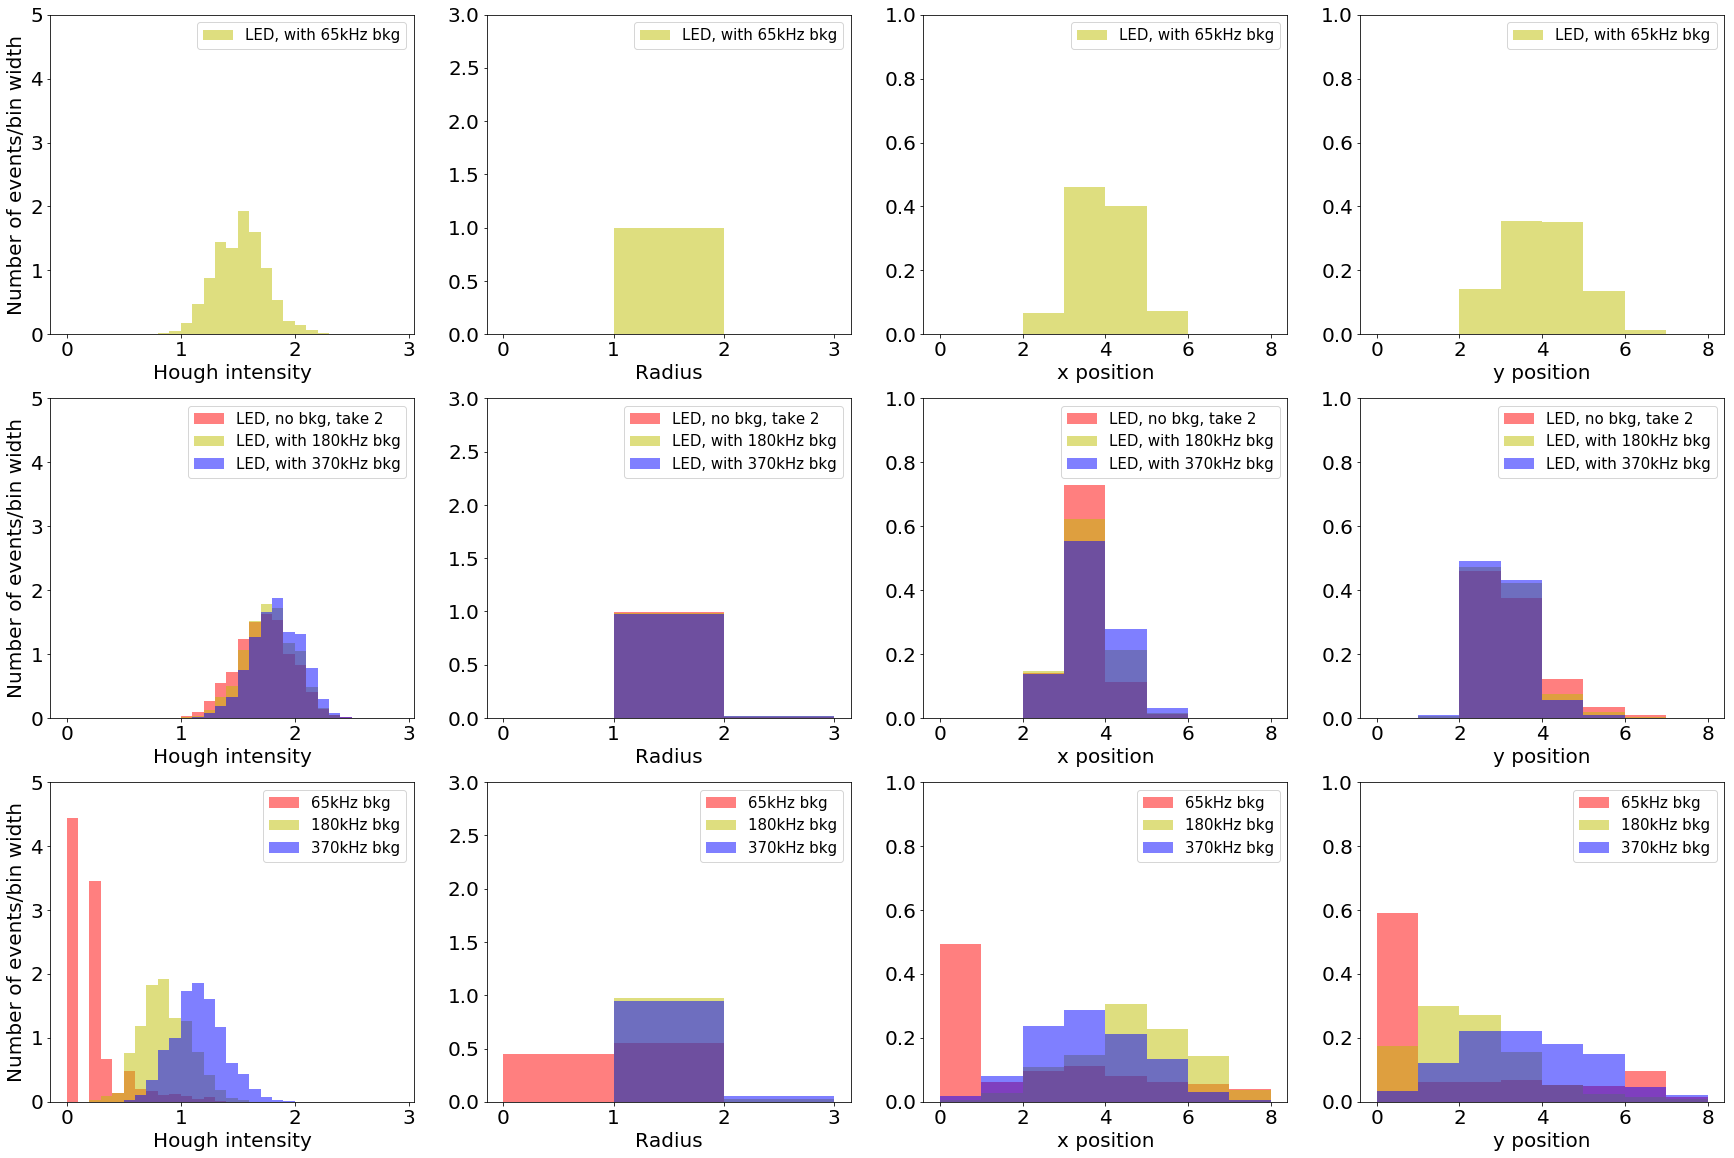

In [34]:
fig, axs = plt.subplots(3,4,figsize=(30,20))
        
hist_led_quad_sig_65_intensity = axs[0,0].hist(hough_led_quad_sig_65[:,0], bins=np.arange(0,3,0.1), alpha=0.5, density=True, color='y', label='LED, with 65kHz bkg')
hist_led_quad_sig_raw2_intensity = axs[1,0].hist(hough_led_quad_sig_raw2[:,0], bins=np.arange(0,3,0.1), alpha=0.5, density=True, color='r', label='LED, no bkg, take 2')
hist_led_quad_sig_180_intensity = axs[1,0].hist(hough_led_quad_sig_180[:,0], bins=np.arange(0,3,0.1), alpha=0.5, density=True, color='y', label='LED, with 180kHz bkg')
hist_led_quad_sig_370_intensity = axs[1,0].hist(hough_led_quad_sig_370[:,0], bins=np.arange(0,3,0.1), alpha=0.5, density=True, color='b', label='LED, with 370kHz bkg')
hist_led_quad_bkg_65_intensity = axs[2,0].hist(hough_led_quad_bkg_65[:,0], bins=np.arange(0,3,0.1), alpha=0.5, density=True, color='r', label='65kHz bkg')
hist_led_quad_bkg_180_intensity = axs[2,0].hist(hough_led_quad_bkg_180[:,0], bins=np.arange(0,3,0.1), alpha=0.5, density=True, color='y', label='180kHz bkg')
hist_led_quad_bkg_370_intensity = axs[2,0].hist(hough_led_quad_bkg_370[:,0], bins=np.arange(0,3,0.1), alpha=0.5, density=True, color='b', label='370kHz bkg')

hist_led_quad_sig_65_radius = axs[0,1].hist(hough_led_quad_sig_65[:,1], bins=np.arange(4), alpha=0.5, density=True, color='y', label='LED, with 65kHz bkg')
hist_led_quad_sig_raw2_radius = axs[1,1].hist(hough_led_quad_sig_raw2[:,1], bins=np.arange(4), alpha=0.5, density=True, color='r', label='LED, no bkg, take 2')
hist_led_quad_sig_180_radius = axs[1,1].hist(hough_led_quad_sig_180[:,1], bins=np.arange(4), alpha=0.5, density=True, color='y', label='LED, with 180kHz bkg')
hist_led_quad_sig_370_radius = axs[1,1].hist(hough_led_quad_sig_370[:,1], bins=np.arange(4), alpha=0.5, density=True, color='b', label='LED, with 370kHz bkg')
hist_led_quad_bkg_65_radius = axs[2,1].hist(hough_led_quad_bkg_65[:,1], bins=np.arange(4), alpha=0.5, density=True, color='r', label='65kHz bkg')
hist_led_quad_bkg_180_radius = axs[2,1].hist(hough_led_quad_bkg_180[:,1], bins=np.arange(4), alpha=0.5, density=True, color='y', label='180kHz bkg')
hist_led_quad_bkg_370_radius = axs[2,1].hist(hough_led_quad_bkg_370[:,1], bins=np.arange(4), alpha=0.5, density=True, color='b', label='370kHz bkg')

hist_led_quad_sig_65_x = axs[0,2].hist(hough_led_quad_sig_65[:,2], bins=np.arange(9), alpha=0.5, density=True, color='y', label='LED, with 65kHz bkg')
hist_led_quad_sig_raw2_x = axs[1,2].hist(hough_led_quad_sig_raw2[:,2], bins=np.arange(9), alpha=0.5, density=True, color='r', label='LED, no bkg, take 2')
hist_led_quad_sig_180_x = axs[1,2].hist(hough_led_quad_sig_180[:,2], bins=np.arange(9), alpha=0.5, density=True, color='y', label='LED, with 180kHz bkg')
hist_led_quad_sig_370_x = axs[1,2].hist(hough_led_quad_sig_370[:,2], bins=np.arange(9), alpha=0.5, density=True, color='b', label='LED, with 370kHz bkg')
hist_led_quad_bkg_65_x = axs[2,2].hist(hough_led_quad_bkg_65[:,2], bins=np.arange(9), alpha=0.5, density=True, color='r', label='65kHz bkg')
hist_led_quad_bkg_180_x = axs[2,2].hist(hough_led_quad_bkg_180[:,2], bins=np.arange(9), alpha=0.5, density=True, color='y', label='180kHz bkg')
hist_led_quad_bkg_370_x = axs[2,2].hist(hough_led_quad_bkg_370[:,2], bins=np.arange(9), alpha=0.5, density=True, color='b', label='370kHz bkg')

hist_led_quad_sig_65_y = axs[0,3].hist(hough_led_quad_sig_65[:,3], bins=np.arange(9), alpha=0.5, density=True, color='y', label='LED, with 65kHz bkg')
hist_led_quad_sig_raw2_y = axs[1,3].hist(hough_led_quad_sig_raw2[:,3], bins=np.arange(9), alpha=0.5, density=True, color='r', label='LED, no bkg, take 2')
hist_led_quad_sig_180_y = axs[1,3].hist(hough_led_quad_sig_180[:,3], bins=np.arange(9), alpha=0.5, density=True, color='y', label='LED, with 180kHz bkg')
hist_led_quad_sig_370_y = axs[1,3].hist(hough_led_quad_sig_370[:,3], bins=np.arange(9), alpha=0.5, density=True, color='b', label='LED, with 370kHz bkg')
hist_led_quad_bkg_65_y = axs[2,3].hist(hough_led_quad_bkg_65[:,3], bins=np.arange(9), alpha=0.5, density=True, color='r', label='65kHz bkg')
hist_led_quad_bkg_180_y = axs[2,3].hist(hough_led_quad_bkg_180[:,3], bins=np.arange(9), alpha=0.5, density=True, color='y', label='180kHz bkg')
hist_led_quad_bkg_370_y = axs[2,3].hist(hough_led_quad_bkg_370[:,3], bins=np.arange(9), alpha=0.5, density=True, color='b', label='370kHz bkg')

for i in range(3):
    axs[i,0].set_xlabel("Hough intensity",fontsize=20)
    axs[i,1].set_xlabel("Radius",fontsize=20)
    axs[i,2].set_xlabel("x position",fontsize=20)
    axs[i,3].set_xlabel("y position",fontsize=20)
    axs[i,0].set_ylim([0,5])
    axs[i,1].set_ylim([0,3])
    axs[i,2].set_ylim([0,1])
    axs[i,3].set_ylim([0,1])
    for j in range(4):
        axs[i,j].legend(fontsize=15)
        axs[i,j].tick_params(labelsize=20)
        axs[i,0].set_ylabel("Number of events/bin width",fontsize=20)
plt.savefig('quad_dist.png')

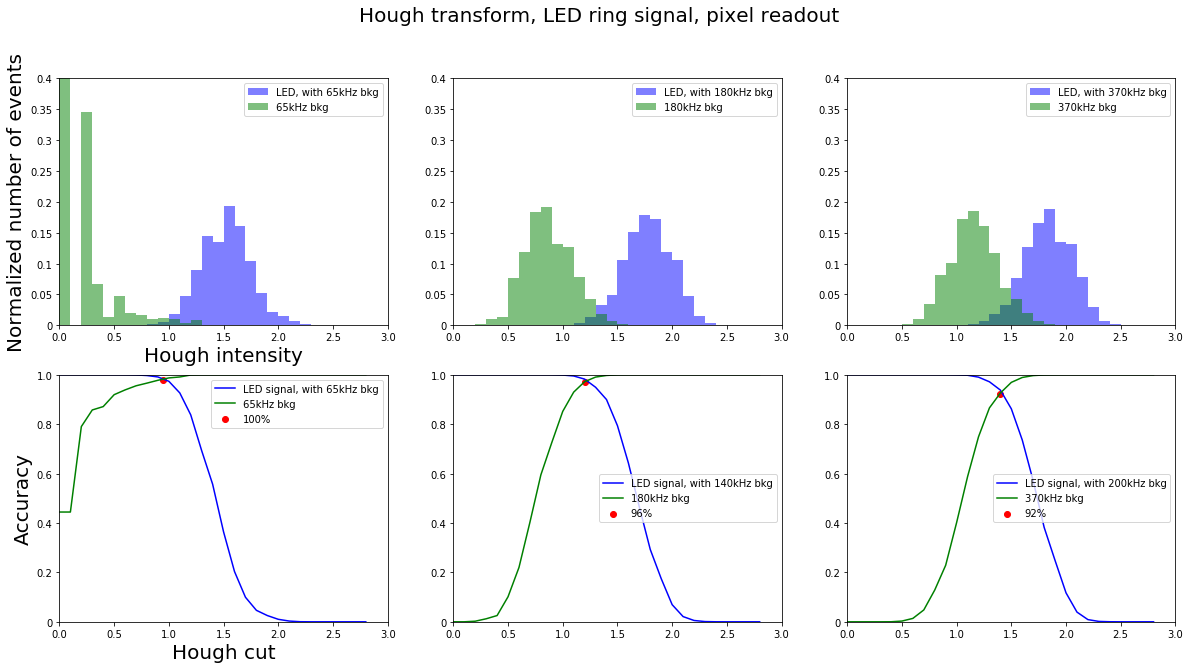

In [43]:
fig, axs = plt.subplots(2,3,figsize=(20,10))

hist_led_quad_sig_65 = axs[0,0].hist(hough_led_quad_sig_65[:,0], bins=np.arange(0,3,0.1), alpha=0.5, density=True, color='b', label='LED, with 65kHz bkg')
hist_led_quad_bkg_65 = axs[0,0].hist(hough_led_quad_bkg_65[:,0], bins=np.arange(0,3,0.1), alpha=0.5, density=True, color='g', label='65kHz bkg')

hist_led_quad_sig_180 = axs[0,1].hist(hough_led_quad_sig_180[:,0], bins=np.arange(0,3,0.1), alpha=0.5, density=True, color='b', label='LED, with 180kHz bkg')
hist_led_quad_bkg_180 = axs[0,1].hist(hough_led_quad_bkg_180[:,0], bins=np.arange(0,3,0.1), alpha=0.5, density=True, color='g', label='180kHz bkg')

hist_led_quad_sig_370 = axs[0,2].hist(hough_led_quad_sig_370[:,0], bins=np.arange(0,3,0.1), alpha=0.5, density=True, color='b', label='LED, with 370kHz bkg')
hist_led_quad_bkg_370 = axs[0,2].hist(hough_led_quad_bkg_370[:,0], bins=np.arange(0,3,0.1), alpha=0.5, density=True, color='g', label='370kHz bkg')

axs[1,0].plot(np.arange(0,2.9,0.1), 10-np.cumsum(hist_led_quad_sig_65[0]),color='b', label='LED signal, with 65kHz bkg')
axs[1,0].plot(np.arange(0,2.9,0.1), np.cumsum(hist_led_quad_bkg_65[0]),color='g', label='65kHz bkg')
axs[1,0].scatter(0.95,9.8, color='r', label="100%")

axs[1,1].plot(np.arange(0,2.9,0.1), 10-np.cumsum(hist_led_quad_sig_180[0]),color='b', label='LED signal, with 140kHz bkg')
axs[1,1].plot(np.arange(0,2.9,0.1), np.cumsum(hist_led_quad_bkg_180[0]),color='g', label='180kHz bkg')
axs[1,1].scatter(1.2,9.7, color='r', label="96%")

axs[1,2].plot(np.arange(0,2.9,0.1), 10-np.cumsum(hist_led_quad_sig_370[0]),color='b', label='LED signal, with 200kHz bkg')
axs[1,2].plot(np.arange(0,2.9,0.1), np.cumsum(hist_led_quad_bkg_370[0]),color='g', label='370kHz bkg')
axs[1,2].scatter(1.4,9.2, color='r', label="92%")

fig.suptitle("Hough transform, LED ring signal, pixel readout",fontsize=20)
for i in range(3):
    axs[0,i].legend(fontsize=10)
    axs[0,0].set_xlabel("Hough intensity",fontsize=20)
    axs[0,0].set_ylabel("Normalized number of events",fontsize=20)
    axs[0,i].set_xlim([0,3])
    axs[0,i].set_ylim([0,4])
    axs[0,i].set_yticklabels([0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40])
for i in range(3):
    axs[1,i].legend(fontsize=10)
    axs[1,0].set_xlabel("Hough cut",fontsize=20)
    axs[1,0].set_ylabel("Accuracy",fontsize=20)
    axs[1,i].set_xlim([0,3])
    axs[1,i].set_ylim([0,10])
    axs[1,i].set_yticklabels([0,0.2,0.4,0.6,0.8,1.0])
plt.savefig('quad_accuracy.png')

In [5]:
hough_led_quad_sig_180_80ns = train_hough_led_quad("data/benchtest/fadc/signalLED_bgLED180_run2339_fadc.ml")
hough_led_quad_sig_370_80ns = train_hough_led_quad("data/benchtest/fadc/signalLED_bgLED370_run2337_fadc.ml")
hough_led_quad_bkg_180_80ns = train_hough_led_quad("data/benchtest/fadc/bgLED_180_run2345_fadc_LED.ml")
hough_led_quad_bkg_370_80ns = train_hough_led_quad("data/benchtest/fadc/bgLED_370_run2369_fadc_LED.ml")

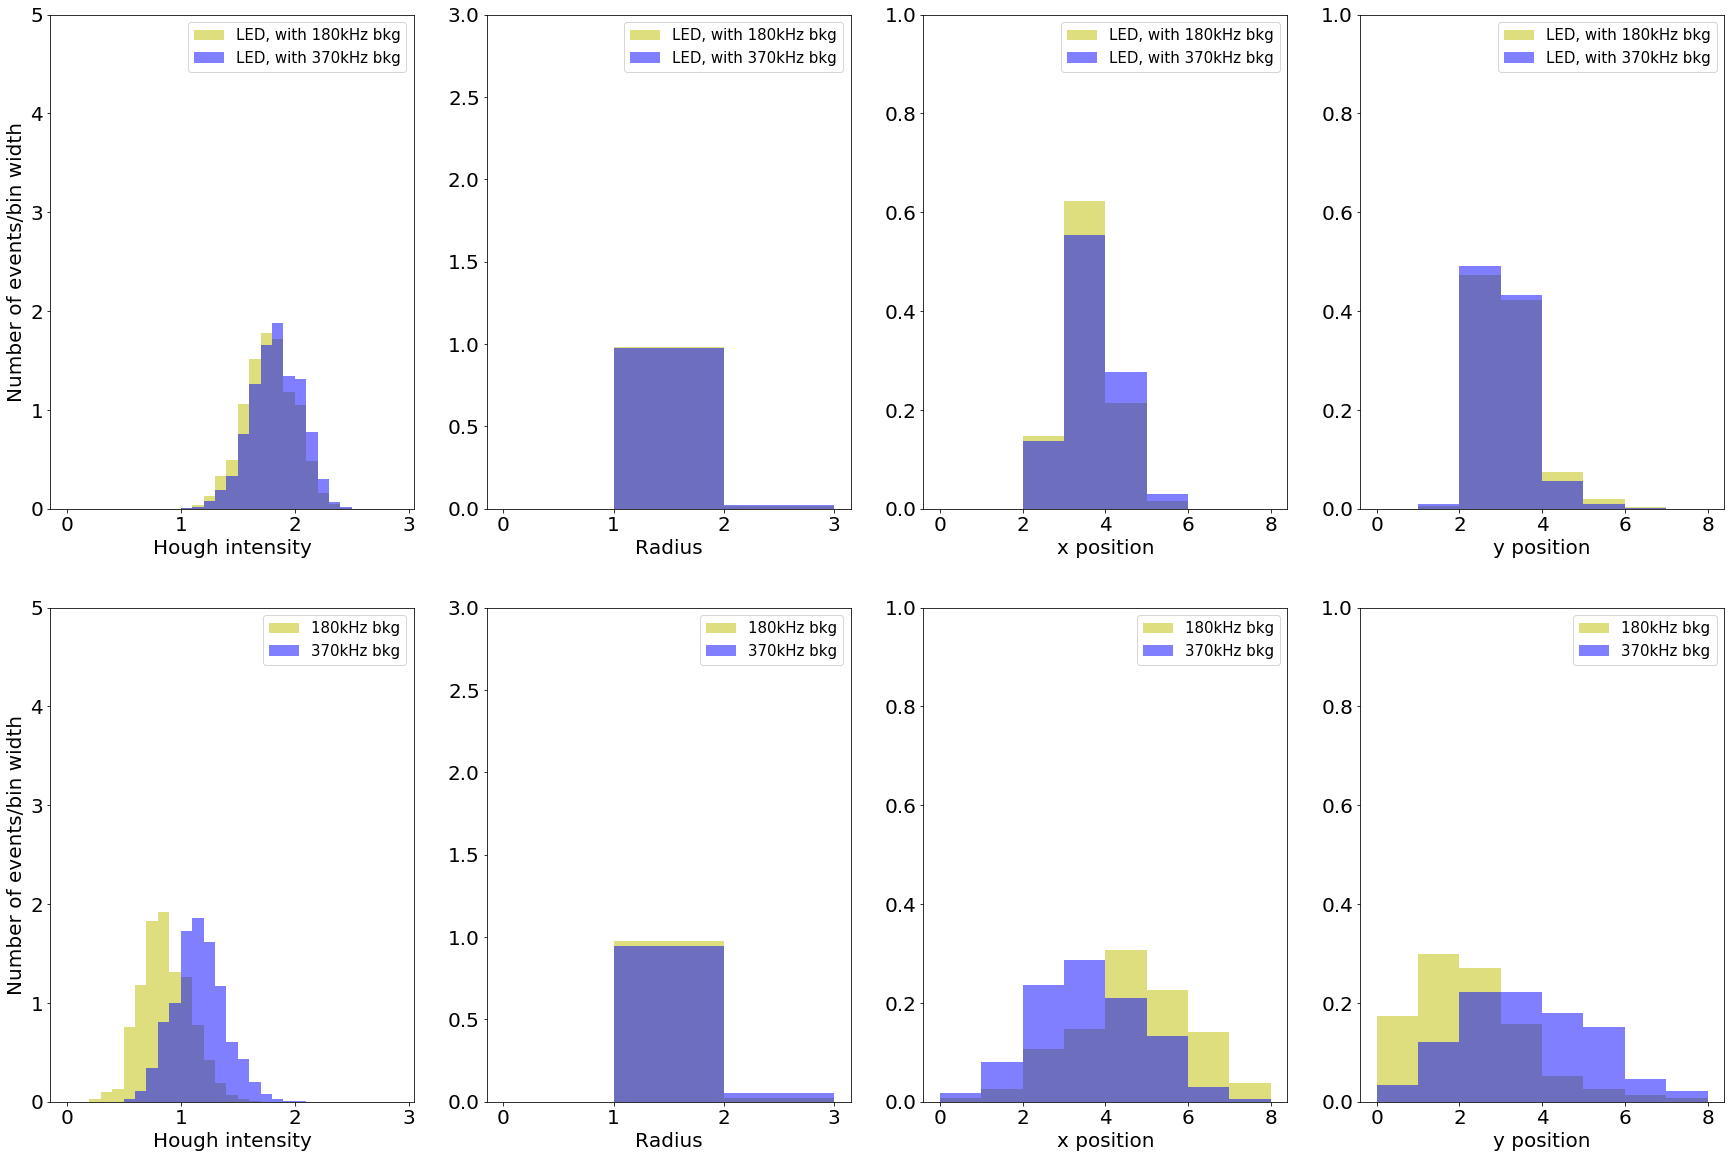

In [6]:
fig, axs = plt.subplots(2,4,figsize=(30,20))
        
hist_led_quad_sig_180_80ns_intensity = axs[0,0].hist(hough_led_quad_sig_180_80ns[:,0], bins=np.arange(0,3,0.1), alpha=0.5, density=True, color='y', label='LED, with 180kHz bkg')
hist_led_quad_sig_370_80ns_intensity = axs[0,0].hist(hough_led_quad_sig_370_80ns[:,0], bins=np.arange(0,3,0.1), alpha=0.5, density=True, color='b', label='LED, with 370kHz bkg')
hist_led_quad_bkg_180_80ns_intensity = axs[1,0].hist(hough_led_quad_bkg_180_80ns[:,0], bins=np.arange(0,3,0.1), alpha=0.5, density=True, color='y', label='180kHz bkg')
hist_led_quad_bkg_370_80ns_intensity = axs[1,0].hist(hough_led_quad_bkg_370_80ns[:,0], bins=np.arange(0,3,0.1), alpha=0.5, density=True, color='b', label='370kHz bkg')

hist_led_quad_sig_180_80ns_radius = axs[0,1].hist(hough_led_quad_sig_180_80ns[:,1], bins=np.arange(4), alpha=0.5, density=True, color='y', label='LED, with 180kHz bkg')
hist_led_quad_sig_370_80ns_radius = axs[0,1].hist(hough_led_quad_sig_370_80ns[:,1], bins=np.arange(4), alpha=0.5, density=True, color='b', label='LED, with 370kHz bkg')
hist_led_quad_bkg_180_80ns_radius = axs[1,1].hist(hough_led_quad_bkg_180_80ns[:,1], bins=np.arange(4), alpha=0.5, density=True, color='y', label='180kHz bkg')
hist_led_quad_bkg_370_80ns_radius = axs[1,1].hist(hough_led_quad_bkg_370_80ns[:,1], bins=np.arange(4), alpha=0.5, density=True, color='b', label='370kHz bkg')

hist_led_quad_sig_180_80ns_x = axs[0,2].hist(hough_led_quad_sig_180_80ns[:,2], bins=np.arange(9), alpha=0.5, density=True, color='y', label='LED, with 180kHz bkg')
hist_led_quad_sig_370_80ns_x = axs[0,2].hist(hough_led_quad_sig_370_80ns[:,2], bins=np.arange(9), alpha=0.5, density=True, color='b', label='LED, with 370kHz bkg')
hist_led_quad_bkg_180_80ns_x = axs[1,2].hist(hough_led_quad_bkg_180_80ns[:,2], bins=np.arange(9), alpha=0.5, density=True, color='y', label='180kHz bkg')
hist_led_quad_bkg_370_80ns_x = axs[1,2].hist(hough_led_quad_bkg_370_80ns[:,2], bins=np.arange(9), alpha=0.5, density=True, color='b', label='370kHz bkg')

hist_led_quad_sig_180_80ns_y = axs[0,3].hist(hough_led_quad_sig_180_80ns[:,3], bins=np.arange(9), alpha=0.5, density=True, color='y', label='LED, with 180kHz bkg')
hist_led_quad_sig_370_80ns_y = axs[0,3].hist(hough_led_quad_sig_370_80ns[:,3], bins=np.arange(9), alpha=0.5, density=True, color='b', label='LED, with 370kHz bkg')
hist_led_quad_bkg_180_80ns_y = axs[1,3].hist(hough_led_quad_bkg_180_80ns[:,3], bins=np.arange(9), alpha=0.5, density=True, color='y', label='180kHz bkg')
hist_led_quad_bkg_370_80ns_y = axs[1,3].hist(hough_led_quad_bkg_370_80ns[:,3], bins=np.arange(9), alpha=0.5, density=True, color='b', label='370kHz bkg')

for i in range(2):
    axs[i,0].set_xlabel("Hough intensity",fontsize=20)
    axs[i,1].set_xlabel("Radius",fontsize=20)
    axs[i,2].set_xlabel("x position",fontsize=20)
    axs[i,3].set_xlabel("y position",fontsize=20)
    axs[i,0].set_ylim([0,5])
    axs[i,1].set_ylim([0,3])
    axs[i,2].set_ylim([0,1])
    axs[i,3].set_ylim([0,1])
    for j in range(4):
        axs[i,j].legend(fontsize=15)
        axs[i,j].tick_params(labelsize=20)
        axs[i,0].set_ylabel("Number of events/bin width",fontsize=20)
#plt.savefig('quad_dist.png')

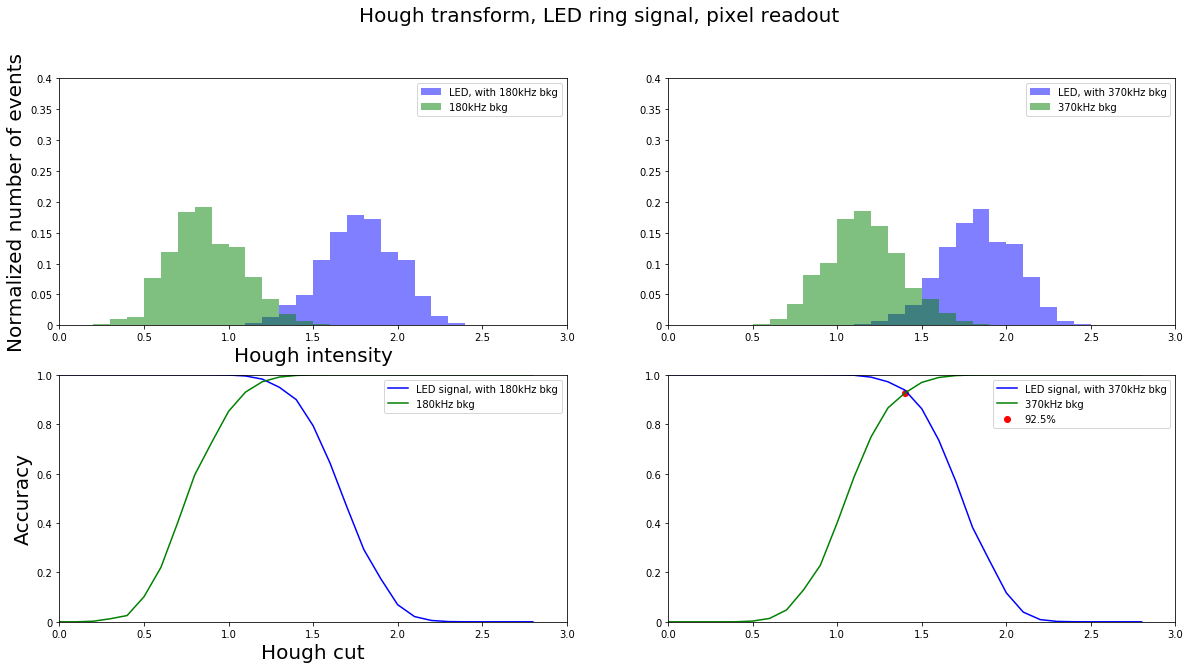

In [11]:
fig, axs = plt.subplots(2,2,figsize=(20,10))

hist_led_quad_sig_180_80ns = axs[0,0].hist(hough_led_quad_sig_180_80ns[:,0], bins=np.arange(0,3,0.1), alpha=0.5, density=True, color='b', label='LED, with 180kHz bkg')
hist_led_quad_bkg_180_80ns = axs[0,0].hist(hough_led_quad_bkg_180_80ns[:,0], bins=np.arange(0,3,0.1), alpha=0.5, density=True, color='g', label='180kHz bkg')

hist_led_quad_sig_370_80ns = axs[0,1].hist(hough_led_quad_sig_370_80ns[:,0], bins=np.arange(0,3,0.1), alpha=0.5, density=True, color='b', label='LED, with 370kHz bkg')
hist_led_quad_bkg_370_80ns = axs[0,1].hist(hough_led_quad_bkg_370_80ns[:,0], bins=np.arange(0,3,0.1), alpha=0.5, density=True, color='g', label='370kHz bkg')

axs[1,0].plot(np.arange(0,2.9,0.1), 10-np.cumsum(hist_led_quad_sig_180_80ns[0]),color='b', label='LED signal, with 180kHz bkg')
axs[1,0].plot(np.arange(0,2.9,0.1), np.cumsum(hist_led_quad_bkg_180_80ns[0]),color='g', label='180kHz bkg')
#axs[1,0].scatter(0.95,9.8, color='r', label="100%")

axs[1,1].plot(np.arange(0,2.9,0.1), 10-np.cumsum(hist_led_quad_sig_370_80ns[0]),color='b', label='LED signal, with 370kHz bkg')
axs[1,1].plot(np.arange(0,2.9,0.1), np.cumsum(hist_led_quad_bkg_370_80ns[0]),color='g', label='370kHz bkg')
axs[1,1].scatter(1.4,9.25, color='r', label="92.5%")

#axs[1,2].plot(np.arange(0,2.9,0.1), 10-np.cumsum(hist_led_quad_sig_370[0]),color='b', label='LED signal, with 200kHz bkg')
#axs[1,2].plot(np.arange(0,2.9,0.1), np.cumsum(hist_led_quad_bkg_370[0]),color='g', label='370kHz bkg')
#axs[1,2].scatter(1.4,9.2, color='r', label="92%")

fig.suptitle("Hough transform, LED ring signal, pixel readout",fontsize=20)
for i in range(2):
    axs[0,i].legend(fontsize=10)
    axs[0,0].set_xlabel("Hough intensity",fontsize=20)
    axs[0,0].set_ylabel("Normalized number of events",fontsize=20)
    axs[0,i].set_xlim([0,3])
    axs[0,i].set_ylim([0,4])
    axs[0,i].set_yticklabels([0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40])
for i in range(2):
    axs[1,i].legend(fontsize=10)
    axs[1,0].set_xlabel("Hough cut",fontsize=20)
    axs[1,0].set_ylabel("Accuracy",fontsize=20)
    axs[1,i].set_xlim([0,3])
    axs[1,i].set_ylim([0,10])
    axs[1,i].set_yticklabels([0,0.2,0.4,0.6,0.8,1.0])
plt.savefig('quad_accuracy.png')